# Import

In [ ]:
#ถ้าอยากใช้ classification_report ต้องใช้ version นี้ 
#กดรันไทม์ใหม่ แล้วใช้อันนี้แทน
!pip install -U 'scikit-learn<0.24'

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install sklearn-crfsuite

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import sklearn
sklearn.__version__

'0.23.2'

In [ ]:
import sklearn_crfsuite
import sklearn_crfsuite.metrics
import pandas as pd

#Read data

In [ ]:
def load_data(file_name):
  with open(file_name) as f:
    sentences = f.read().strip('\n').split('\n\n')
    X = []
    Y = []
    for sentence in sentences:
      lines = sentence.split('\n')
      word_list = []
      label_list = []
      for line in lines:
          word, ner_tag = line.split('\t')
          
          label_list.append(ner_tag)
          word_list.append(word)
      X.append(word_list)
      Y.append(label_list)
  return (X, Y)

In [ ]:
Xtrain, Ytrain = load_data('/content/trainVerdict.tsv')
Xdev, Ydev = load_data('/content/devVerdict.tsv')

In [ ]:
Xtrain[0]

['2526/2468',
 'ย่อสั้น',
 'ขณะที่',
 'อ.ลูกจ้างของจำเลยขับรถยนต์มาตามถนนตามปกติได้มีผู้ขับขี่รถจักรยานยนต์ออกจากซอยด้านซ้ายมือตัดหน้ารถยนต์ที่',
 'อ.ขับโดยกระชั้นชิด',
 'อ.จึงหักหลบเป็นเหตุให้ชนกับรถยนต์ที่โจทก์ขับสวนทางมา',
 'ดังนี้ถือไม่ได้ว่า',
 'อ.ขับรถด้วยความประมาทเพราะอ.ไม่มีโอกาสที่ทันได้คิดหรือตัดสินใจว่าจะหักหลบไปทางซ้ายหรือทางขวา',
 'เหตุที่เกิดขึ้นจึงมิใช่เพราะความประมาทของ',
 'อ.จำเลยที่',
 '1',
 'ซึ่งเป็นนายจ้างของ',
 'อ.จึงไม่ต้องรับผิดต่อโจทก์',
 'ย่อยาว',
 'โจทก์ฟ้องว่า',
 'จำเลยที่',
 '1',
 'เช่าซื้อรถยนต์คันเกิดเหตุจากจำเลยที่',
 '2และใช้ให้นายอุ่นลูกจ้างของจำเลยที่',
 '1',
 'ขับรถยนต์ดังกล่าวไปในทางการที่จ้างนายอุ่นขับรถยนต์ด้วยความประมาทหักหลบรถจักรยานยนต์ออกไปทางขวาของถนนอย่างกะทันหันโดยมิได้ระมัดระวังดูรถที่วิ่งสวนมา',
 'เป็นเหตุให้รถยนต์ที่นายอุ่นขับชนกับรถยนต์ที่โจทก์ขับสวนทางมา',
 'ทำให้โจทก์ได้รับบาดเจ็บสาหัส',
 'ขอให้จำเลยทั้งสองใช้ค่าเสียหายแก่โจทก์',
 'จำเลยที่',
 '1',
 'ให้การว่า',
 'นายอุ่นไม่ใช่ลูกจ้างของจำเลยที่',
 '1',
 'นายอุ่นมิได้ประมาทอุบัติเหตุท

In [ ]:
Ytrain[0]

['O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'B-verdict',
 'I-verdict',
 'I-verdict',
 'I-verdict',
 'I-verdict',
 'I-verdict',
 'I-verdict',
 'I-verdict',
 'I-verdict',
 'I-verdict',
 'I-verdict',
 'I-verdict',
 'I-verdict',
 'I-verdict',
 'I-verdict',
 'I-verdict']

In [ ]:
len(Xtrain) == len(Ytrain)

True

In [ ]:
len(Xdev) == len(Ydev)

True

# เทรน + evaluate
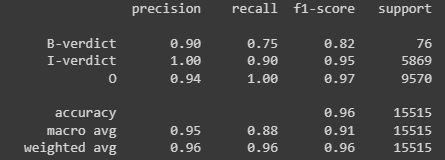

In [ ]:
def train_and_evaluate(X_train, Y_train, X_test, Y_test):    
    crf = sklearn_crfsuite.CRF()
    crf.fit(X_train, Y_train)
    pred = crf.predict(X_test)
    print(sklearn_crfsuite.metrics.flat_classification_report(Y_test, pred))
    return sklearn_crfsuite.metrics.flat_f1_score(Y_test, pred, average='macro'), crf, pred

In [ ]:
f1, model, pred = train_and_evaluate(Xtrain, Ytrain, Xdev, Ydev)

              precision    recall  f1-score   support

   B-verdict       0.90      0.75      0.82        76
   I-verdict       1.00      0.90      0.95      5869
           O       0.94      1.00      0.97      9570

    accuracy                           0.96     15515
   macro avg       0.95      0.88      0.91     15515
weighted avg       0.96      0.96      0.96     15515



/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:67: FutureWarning: Pass labels=None as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


# ทำตัวที่ถูก predict

In [ ]:
### พึ่งแก้ มารันใหม่อีกรอบ
result99 = [] #change here
for i in range(len(Xdev)):
    l = []
    for t in range(len(Xdev[i])):
        t = (Xdev[i][t], pred[i][t]) #change here
        l.append(t)
    result99.append(l)

In [ ]:
len(pred[0])

414

In [ ]:
len(Xdev[0])

414

In [ ]:
result99[7]

[('2538/2639', 'O'),
 ('ย่อสั้น', 'O'),
 ('คดีมีทุนทรัพย์ที่พิพาทกันในชั้นฎีกาไม่เกิน', 'O'),
 ('200,000', 'O'),
 ('บาทต้องห้ามมิให้คู่ความฎีกาในข้อเท็จจริงตาม', 'O'),
 ('ป', 'O'),
 ('.', 'O'),
 ('วิ', 'O'),
 ('.', 'O'),
 ('พ', 'O'),
 ('.', 'O'),
 ('มาตรา', 'O'),
 ('248', 'O'),
 ('วรรคหนึ่ง', 'O'),
 ('ที่จำเลยทั้งแปดฎีกาว่า', 'O'),
 ('จำเลยทั้งแปดไม่เคยนำวัวไปเลี้ยงในไร่อ้อยของโจทก์', 'O'),
 ('จึงไม่ได้ร่วมกันทำละเมิดต่อโจทก์', 'O'),
 ('เป็นฎีกาโต้เถียงดุลพินิจในการรับฟังพยานหลักฐานของศาลอุทธรณ์ภาค', 'O'),
 ('1', 'O'),
 ('ซึ่งฟังว่าจำเลยทั้งแปดซึ่งเป็นคู่สามีภรรยากันต่างคู่ต่างปล่อยวัวของตนเข้าไปกินอ้อยของโจทก์อันเป็นละเมิด',
  'O'),
 ('เป็นฎีกาในข้อเท็จจริง', 'O'),
 ('ศาลฎีกาไม่รับวินิจฉัย', 'O'),
 ('แม้โจทก์ฟ้องว่าจำเลยทั้งแปดร่วมกันไล่ต้อนวัวเข้าไปกินอ้อยในไร่ของโจทก์',
  'O'),
 ('แต่ทางพิจารณาได้ความว่าจำเลยทั้งแปดต่างคู่สามีภรรยาต่างปล่อยวัวของตนเข้าไปกินอ้อยของโจทก์',
  'O'),
 ('ก็เป็นข้อแตกต่างในรายละเอียดซึ่งเป็นเรื่องเล็กน้อย', 'O'),
 ('ไม่ถึงกับเป็นเรื่องนอกจากที่ปรากฏในคำฟ้อ

In [ ]:
Xdev

In [ ]:
len(result99)

76

In [ ]:
def verdict_pharse(sentence):
  pharse = []
  tag = ''
  for text, NE in sentence:
    if NE[0] == 'B' and len(pharse) == 0:
      # print(text)
      # print(NE)
      pharse.append(text)
      if NE[2:] == 'verdict':
        tag = 'VERDICT'
      # print(tag)
    elif NE[0] == 'I' and len(pharse) > 0:
      pharse.append(text)
  # print(pharse)
  return (tag, ''.join(pharse))

In [ ]:
eva = []
for sent in result99:
    extract = [verdict_pharse(sent)]
    # print(extract)
    eva.append(extract)
print(eva)

[[('VERDICT', 'ศาลฎีกาวินิจฉัยว่ามีประเด็นที่จะวินิจฉัยในชั้นนี้เฉพาะที่เกี่ยวกับจำเลยที่๑ถึงที่๓ว่าฟ้องโจทก์ที่เกี่ยวกับจำเลยที่๑ถึงที่๓เป็นการฟ้องเรียกค่าสินไหมทดแทนเพื่อละเมิดหรือไม่และคดีโจทก์ขาดอายุความหรือไม่เห็นว่าคดีโจทก์ที่เกี่ยวกับจำเลยที่๑ถึงที่๓นั้นเป็นคดีที่กล่าวหาว่าจำเลยจงใจไม่ปฏิบัติหน้าที่ตามระเบียบแบบแผนไม่ควบคุมดูแลการรับเงินและการส่งเงินจนเป็นเหตุให้จำเลยที่๔ยักยอกเงินของโจทก์ไปได้และทำให้โจทก์เสียหายจึงเป็นการฟ้องโดยอาศัยมูลละเมิดและเรียกค่าสินไหมทดแทนโจทก์ย่อมมีสิทธิที่จะฟ้องได้ส่วนในประเด็นที่ว่าคดีโจทก์สำหรับจำเลยที่๑ถึงที่๓ขาดอายุความหรือไม่นั้นเห็นว่าฟ้องโจทก์กล่างอ้างว่าจำเลยที่๑ถึงที่๓จงใจไม่ปฎิบัติหน้าที่ตามกฎหมายระเบียบแบบแผนจนเป็นเหตุให้จำเลยที่๔ยักยอกเงินของโจทก์ไปเป็นการฟ้องโดยมูลละเมิดทั่วๆมิใช่มูลละเมิดอันเป็นความผิดมีโทษทางอาญาตามประมวลกฎหมายแพ่งและพาณิชย์มาตรา๔๔๘วรรคสองจึงมีอายุความ๑ปีตามประมวลกฎหมายแพ่งและพาณิชย์มาตรา๔๔๘วรรคแรกซึ่งต้องเริ่มนับอายุความตั้งแต่วันที่ผู้ต้องเสียหายรู้ถึงการละเมิดและรู้ตัวผู้พึงต้องใช้ค่าสินไหมทดแทนและในกรณีนิติบุคคลเป็

In [ ]:
print(len(eva))

76


In [ ]:
for subj in eva:
  print(subj)

[('VERDICT', 'ศาลฎีกาวินิจฉัยว่ามีประเด็นที่จะวินิจฉัยในชั้นนี้เฉพาะที่เกี่ยวกับจำเลยที่๑ถึงที่๓ว่าฟ้องโจทก์ที่เกี่ยวกับจำเลยที่๑ถึงที่๓เป็นการฟ้องเรียกค่าสินไหมทดแทนเพื่อละเมิดหรือไม่และคดีโจทก์ขาดอายุความหรือไม่เห็นว่าคดีโจทก์ที่เกี่ยวกับจำเลยที่๑ถึงที่๓นั้นเป็นคดีที่กล่าวหาว่าจำเลยจงใจไม่ปฏิบัติหน้าที่ตามระเบียบแบบแผนไม่ควบคุมดูแลการรับเงินและการส่งเงินจนเป็นเหตุให้จำเลยที่๔ยักยอกเงินของโจทก์ไปได้และทำให้โจทก์เสียหายจึงเป็นการฟ้องโดยอาศัยมูลละเมิดและเรียกค่าสินไหมทดแทนโจทก์ย่อมมีสิทธิที่จะฟ้องได้ส่วนในประเด็นที่ว่าคดีโจทก์สำหรับจำเลยที่๑ถึงที่๓ขาดอายุความหรือไม่นั้นเห็นว่าฟ้องโจทก์กล่างอ้างว่าจำเลยที่๑ถึงที่๓จงใจไม่ปฎิบัติหน้าที่ตามกฎหมายระเบียบแบบแผนจนเป็นเหตุให้จำเลยที่๔ยักยอกเงินของโจทก์ไปเป็นการฟ้องโดยมูลละเมิดทั่วๆมิใช่มูลละเมิดอันเป็นความผิดมีโทษทางอาญาตามประมวลกฎหมายแพ่งและพาณิชย์มาตรา๔๔๘วรรคสองจึงมีอายุความ๑ปีตามประมวลกฎหมายแพ่งและพาณิชย์มาตรา๔๔๘วรรคแรกซึ่งต้องเริ่มนับอายุความตั้งแต่วันที่ผู้ต้องเสียหายรู้ถึงการละเมิดและรู้ตัวผู้พึงต้องใช้ค่าสินไหมทดแทนและในกรณีนิติบุคคลเป็น

In [ ]:
import json
json.dump(eva, open('dev_ent.json', encoding='utf8', mode='w'))

In [ ]:
print(extract)

('2531/3669ย่อสั้นโจทก์บรรยายฟ้องกล่าวหาว่าจำเลยที่1ถึงที่3จงใจไม่ปฏิบัติหน้าที่ตามระเบียบแบบแผนไม่ควบคุมดูแลการรับเงินและการส่งเงินจนเป็นเหตุให้จำเลยที่4ยักยอกเงินของโจทก์ไปได้และทำให้โจทก์เสียหายเป็นการฟ้องโดยอาศัยมูลละเมิดและเรียกค่าสินไหมทดแทนโจทก์ย่อมมีสิทธิฟ้องได้โจทก์ฟ้องจำเลยที่1ถึงที่3โดยมูลละเมิดทั่วไปมิใช่มูลละเมิดอันเป็นความผิดมีโทษทางอาญาจึงมีอายุความ1ปีตามประมวลกฎหมายแพ่งและพาณิชย์มาตรา448วรรคแรกซึ่งต้องเริ่มนับอายุความตั้งแต่วันที่ผู้ต้องเสียหายรู้ถึงการละเมิดและรู้ตัวผู้จะพึงต้องใช้ค่าสินไหมทดแทนและในกรณ์นิติบุคคลเป็นผู้เสียหายย่อมต้องนับจากวันที่ผู้แทนของนิติบุคคลได้รู้ดังกล่าวโจทก์เป็นสุขาภิบาลตูมใต้มีนายอำเภอกุมภวาปีเป็นประธานโดยตำแหน่งขณะเกิดเหตุจำเลยที่1เป็นนายอำเภอกุมภวาปีสารวัตรใหญ่แจ้งความว่าได้รับคำสั่งให้ดำเนินคดีอาญากับจำเลยทั้งสี่และจำเลยที่1ที่2ได้เข้ามอบตัวในวันเดียวกันการแจ้งความดังกล่าวมิใช่การแจ้งความของจำเลยที่3ซึ่งเป็นผู้แทนโจทก์และจำเลยที่1ก็ตกเป็นผู้ต้องหาด้วยจะถือว่ารู้ตัวผู้จะต้องรับผิดรายอื่นๆไม่ได้จึงยังถือไม่ได้ว่าเป็นผู้แทนโจทก์รู้ถึงการละเมิด

In [ ]:
tester = result99[0]

In [ ]:
result99[7]

In [ ]:
tester[:5]

[('2531/3669', 'O'),
 ('ย่อสั้น', 'O'),
 ('โจทก์บรรยายฟ้องกล่าวหาว่าจำเลยที่', 'O'),
 ('1', 'O'),
 ('ถึงที่', 'O')]

In [ ]:
verdict_pharse(tester)

('VERDICT',
 'ศาลฎีกาวินิจฉัยว่ามีประเด็นที่จะวินิจฉัยในชั้นนี้เฉพาะที่เกี่ยวกับจำเลยที่๑ถึงที่๓ว่าฟ้องโจทก์ที่เกี่ยวกับจำเลยที่๑ถึงที่๓เป็นการฟ้องเรียกค่าสินไหมทดแทนเพื่อละเมิดหรือไม่และคดีโจทก์ขาดอายุความหรือไม่เห็นว่าคดีโจทก์ที่เกี่ยวกับจำเลยที่๑ถึงที่๓นั้นเป็นคดีที่กล่าวหาว่าจำเลยจงใจไม่ปฏิบัติหน้าที่ตามระเบียบแบบแผนไม่ควบคุมดูแลการรับเงินและการส่งเงินจนเป็นเหตุให้จำเลยที่๔ยักยอกเงินของโจทก์ไปได้และทำให้โจทก์เสียหายจึงเป็นการฟ้องโดยอาศัยมูลละเมิดและเรียกค่าสินไหมทดแทนโจทก์ย่อมมีสิทธิที่จะฟ้องได้ส่วนในประเด็นที่ว่าคดีโจทก์สำหรับจำเลยที่๑ถึงที่๓ขาดอายุความหรือไม่นั้นเห็นว่าฟ้องโจทก์กล่างอ้างว่าจำเลยที่๑ถึงที่๓จงใจไม่ปฎิบัติหน้าที่ตามกฎหมายระเบียบแบบแผนจนเป็นเหตุให้จำเลยที่๔ยักยอกเงินของโจทก์ไปเป็นการฟ้องโดยมูลละเมิดทั่วๆมิใช่มูลละเมิดอันเป็นความผิดมีโทษทางอาญาตามประมวลกฎหมายแพ่งและพาณิชย์มาตรา๔๔๘วรรคสองจึงมีอายุความ๑ปีตามประมวลกฎหมายแพ่งและพาณิชย์มาตรา๔๔๘วรรคแรกซึ่งต้องเริ่มนับอายุความตั้งแต่วันที่ผู้ต้องเสียหายรู้ถึงการละเมิดและรู้ตัวผู้พึงต้องใช้ค่าสินไหมทดแทนและในกรณีนิติบุคคลเป็น

# ทำตัว gold standard

In [ ]:
result999 = [] #change here
for i in range(len(Xdev)):
    l = []
    for t in range(len(Xdev[i])):
        t = (Xdev[i][t], Ydev[i][t]) #change here
        l.append(t)
    result999.append(l)

In [ ]:
result999

[[('2531/3669', 'O'),
  ('ย่อสั้น', 'O'),
  ('โจทก์บรรยายฟ้องกล่าวหาว่าจำเลยที่', 'O'),
  ('1', 'O'),
  ('ถึงที่', 'O'),
  ('3', 'O'),
  ('จงใจไม่ปฏิบัติหน้าที่ตามระเบียบแบบแผน', 'O'),
  ('ไม่ควบคุมดูแลการรับเงินและการส่งเงินจนเป็นเหตุให้จำเลยที่', 'O'),
  ('4', 'O'),
  ('ยักยอกเงินของโจทก์ไปได้และทำให้โจทก์เสียหาย', 'O'),
  ('เป็นการฟ้องโดยอาศัยมูลละเมิดและเรียกค่าสินไหมทดแทน', 'O'),
  ('โจทก์ย่อมมีสิทธิฟ้องได้', 'O'),
  ('โจทก์ฟ้องจำเลยที่', 'O'),
  ('1', 'O'),
  ('ถึงที่', 'O'),
  ('3', 'O'),
  ('โดยมูลละเมิดทั่วไป', 'O'),
  ('มิใช่มูลละเมิดอันเป็นความผิดมีโทษทางอาญา', 'O'),
  ('จึงมีอายุความ', 'O'),
  ('1', 'O'),
  ('ปี', 'O'),
  ('ตามประมวลกฎหมายแพ่งและพาณิชย์', 'O'),
  ('มาตรา', 'O'),
  ('448', 'O'),
  ('วรรคแรก', 'O'),
  ('ซึ่งต้องเริ่มนับอายุความตั้งแต่วันที่ผู้ต้องเสียหายรู้ถึงการละเมิดและรู้ตัวผู้จะพึงต้องใช้ค่าสินไหมทดแทนและในกรณ์นิติบุคคลเป็นผู้เสียหายย่อมต้องนับจากวันที่ผู้แทนของนิติบุคคล',
   'O'),
  ('ได้รู้ดังกล่าว', 'O'),
  ('โจทก์เป็นสุขาภิบาลตูมใต้มีนายอำเภอกุมภวาปีเ

In [ ]:
def verdict_pharse(sentence):
  pharse = []
  tag = ''
  for text, NE in sentence:
    if NE[0] == 'B' and len(pharse) == 0:
      # print(text)
      # print(NE)
      pharse.append(text)
      if NE[2:] == 'verdict':
        tag = 'VERDICT'
      # print(tag)
    elif NE[0] == 'I' and len(pharse) > 0:
      pharse.append(text)
  # print(pharse)
  return (tag, ''.join(pharse))

In [ ]:
eva = []
for sent in result999:
    extract = [verdict_pharse(sent)]
    # print(extract)
    eva.append(extract)
print(eva)

[[('VERDICT', 'ศาลฎีกาวินิจฉัยว่ามีประเด็นที่จะวินิจฉัยในชั้นนี้เฉพาะที่เกี่ยวกับจำเลยที่๑ถึงที่๓ว่าฟ้องโจทก์ที่เกี่ยวกับจำเลยที่๑ถึงที่๓เป็นการฟ้องเรียกค่าสินไหมทดแทนเพื่อละเมิดหรือไม่และคดีโจทก์ขาดอายุความหรือไม่เห็นว่าคดีโจทก์ที่เกี่ยวกับจำเลยที่๑ถึงที่๓นั้นเป็นคดีที่กล่าวหาว่าจำเลยจงใจไม่ปฏิบัติหน้าที่ตามระเบียบแบบแผนไม่ควบคุมดูแลการรับเงินและการส่งเงินจนเป็นเหตุให้จำเลยที่๔ยักยอกเงินของโจทก์ไปได้และทำให้โจทก์เสียหายจึงเป็นการฟ้องโดยอาศัยมูลละเมิดและเรียกค่าสินไหมทดแทนโจทก์ย่อมมีสิทธิที่จะฟ้องได้ส่วนในประเด็นที่ว่าคดีโจทก์สำหรับจำเลยที่๑ถึงที่๓ขาดอายุความหรือไม่นั้นเห็นว่าฟ้องโจทก์กล่างอ้างว่าจำเลยที่๑ถึงที่๓จงใจไม่ปฎิบัติหน้าที่ตามกฎหมายระเบียบแบบแผนจนเป็นเหตุให้จำเลยที่๔ยักยอกเงินของโจทก์ไปเป็นการฟ้องโดยมูลละเมิดทั่วๆมิใช่มูลละเมิดอันเป็นความผิดมีโทษทางอาญาตามประมวลกฎหมายแพ่งและพาณิชย์มาตรา๔๔๘วรรคสองจึงมีอายุความ๑ปีตามประมวลกฎหมายแพ่งและพาณิชย์มาตรา๔๔๘วรรคแรกซึ่งต้องเริ่มนับอายุความตั้งแต่วันที่ผู้ต้องเสียหายรู้ถึงการละเมิดและรู้ตัวผู้พึงต้องใช้ค่าสินไหมทดแทนและในกรณีนิติบุคคลเป็

In [ ]:
len(eva)

76

In [ ]:
import json
json.dump(eva, open('dev_entities.json', encoding='utf8', mode='w'))

# Pharse Level F1

In [ ]:
def compute_prf(gold_list_list, pred_list_list):
    total_gold, total_pred, total_correct = 0, 0, 0
    for g_ent_list, p_ent_list in zip(gold_list_list, pred_list_list):
        g_ent_set = set(g_ent_list)
        p_ent_set = set(p_ent_list)
        total_gold += len(g_ent_set)
        total_pred += len(p_ent_set)
        total_correct += len(g_ent_set.intersection(p_ent_set))
    if total_pred != 0:
        precision = total_correct / total_pred
    else:
        precision = 0
    recall = total_correct / total_gold
    if precision + recall != 0:
        f1 = (2 * precision * recall) / (precision + recall)
    else:
        f1 = 0
    return (precision, recall, f1)

In [ ]:
def evaluate_answer(gold_file, prediction_file):
    gold = json.load(open(gold_file))
    pred = json.load(open(prediction_file))

    assert (len(gold) == len(pred))
    ent_types =['VERDICT']

    results = {}
    gold = [[(e,x) for e,x in alist] for alist in gold]
    pred = [[(e,x) for e,x in alist] for alist in pred]
    p, r, f = compute_prf(gold, pred)
    results['0 Overall F1'] = f
    results['0 Overall P'] = p
    results['0 Overall R'] = r

    for i, ent_type in enumerate(ent_types):
        filtered_gold = [[(e,x) for e,x in alist if e == ent_type] for alist in gold]
        filtered_pred = [[(e,x) for e,x in alist if e == ent_type] for alist in pred]
        _, _, f = compute_prf(filtered_gold, filtered_pred)
        results['{} {} F1'.format(i+1, ent_type)] = f
    return results

In [ ]:
evaluate_answer('/content/dev_entities.json', '/content/dev_ent.json')

{'0 Overall F1': 0.75,
 '0 Overall P': 0.75,
 '0 Overall R': 0.75,
 '1 VERDICT F1': 0.8201438848920864}